<a href="https://colab.research.google.com/github/FarabiOnAMission/Analyzing-and-Predicing-Datas/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Libraries**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Importing the Dataset**

In [17]:
from collections.abc import ValuesView
dataset= pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [18]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [19]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [20]:
y = y.reshape(len(y),1)

In [21]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## **Feature Scaling**

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y= StandardScaler()
X = sc_X.fit_transform(X)
y= sc_y.fit_transform(y)

## **Training the SVR Model on the Whole Dataset** **bold text**

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## **Predicting a New Result**

In [24]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## **Visualizing the Predicted Datasset**

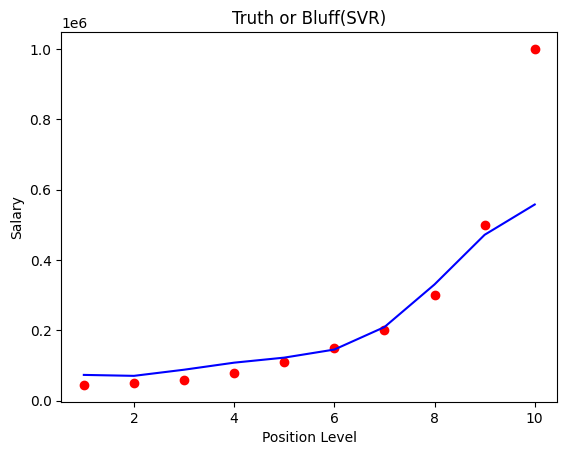

In [25]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Visualizing SVR Results(Smoother Curve and Better Prediction)

/tmp/ipython-input-615080549.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)


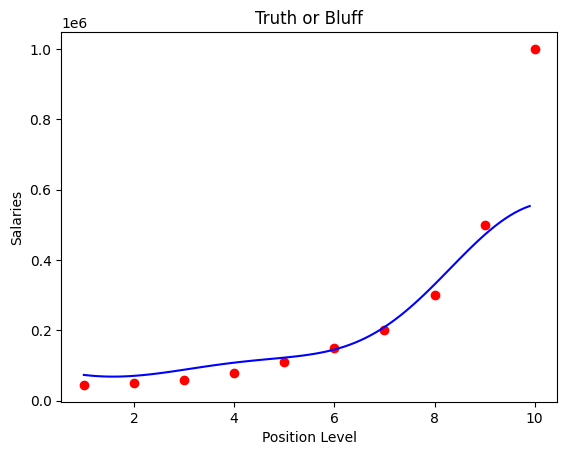

In [26]:
X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid= X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()